In [ ]:

from google.colab import drive
import pandas as pd
import re

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/all_musk_posts.csv'
date_column_name = 'createdAt'
text_column_name = 'fullText'

target_terms = [
    'yeah',
    'tesla',
    'true',
    'legacy media',
    'coming soon',
    'good question',
    'exactly'
]

found_locations = {term: [] for term in target_terms}

try:
    df = pd.read_csv(file_path, parse_dates=[date_column_name], low_memory=False)

    for index, row in df.iterrows():
        line_num = index + 1
        post_date = row[date_column_name]
        post_content = row[text_column_name]

        for term in target_terms:
            if isinstance(post_content, str) and term in post_content.lower():
                found_locations[term].append((line_num, post_date, post_content))

    print(f"Search results in file '{file_path}':\n")
    for term, findings in found_locations.items():
        if findings:
            print(f"--- Term '{term}' found in the following posts: ---")
            for line_num, post_date, post_content in findings:
                formatted_date = post_date.strftime('%Y-%m-%d')
                print(f"  - Line {line_num} (Date: {formatted_date}): \"{post_content}\"")
            print()
        else:
            print(f"--- Term '{term}' was not found in the file. ---\n")

except FileNotFoundError:
    print(f"ERROR: File '{file_path}' not found at the specified path.")
    print("Please make sure the path is correct and the file exists in your Google Drive.")
except KeyError as e:
    print(f"ERROR: A required column was not found in the CSV file: {e}")
    print("Please double-check the column names used in the script.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
This is insane."
  - Line 49946 (Date: 2024-11-25): "@YunTaTsai1 @ibab @xai Yeah, par for the course for many years with Tesla AI 😂"
  - Line 50023 (Date: 2024-11-24): "@BG2Pod @Tesla @Waymo @bgurley @altcap @FredaDuan Coming soon"
  - Line 50046 (Date: 2024-11-24): "@teslaownersSV Ok, maybe nothing"
  - Line 50057 (Date: 2024-11-24): "@teslaownersSV My phone is melting 🫠"
  - Line 50068 (Date: 2024-11-24): "@teslaownersSV Yeah"
  - Line 50113 (Date: 2024-11-23): "@jeffskoll @SpaceX @Tesla Thanks Jeff 😀

Note, xAI is a generalized AI company and was not created as an offshoot of Tesla in any way whatsoever."
  - Line 50125 (Date: 2024-11-23): "@EvaLovesDesign @SpaceX You don’t need to credit SpaceX or Tesla"
  - Line 50351 (Date: 2024-11-21): "Just learned tonight at Mar-a-Lago that Jeff Bezos was telling everyone that @realDonaldTrump would lose for sure, so they should sell all their Tesla and SpaceX stock 🤭"
  - Line 5

Mounting Google Drive...
Mounted at /content/drive
Google Drive mounted successfully.

Attempting to load file: /content/drive/MyDrive/all_musk_posts.csv
Raw CSV file loaded successfully.
Starting tweet analysis...
Data successfully analyzed and aggregated.

Results table saved to Google Drive as: /content/drive/MyDrive/musk_word_frequency_by_year.csv
Chart saved to Google Drive as: /content/drive/MyDrive/tweet_trends_chart.png

Analysis and save process completed successfully!


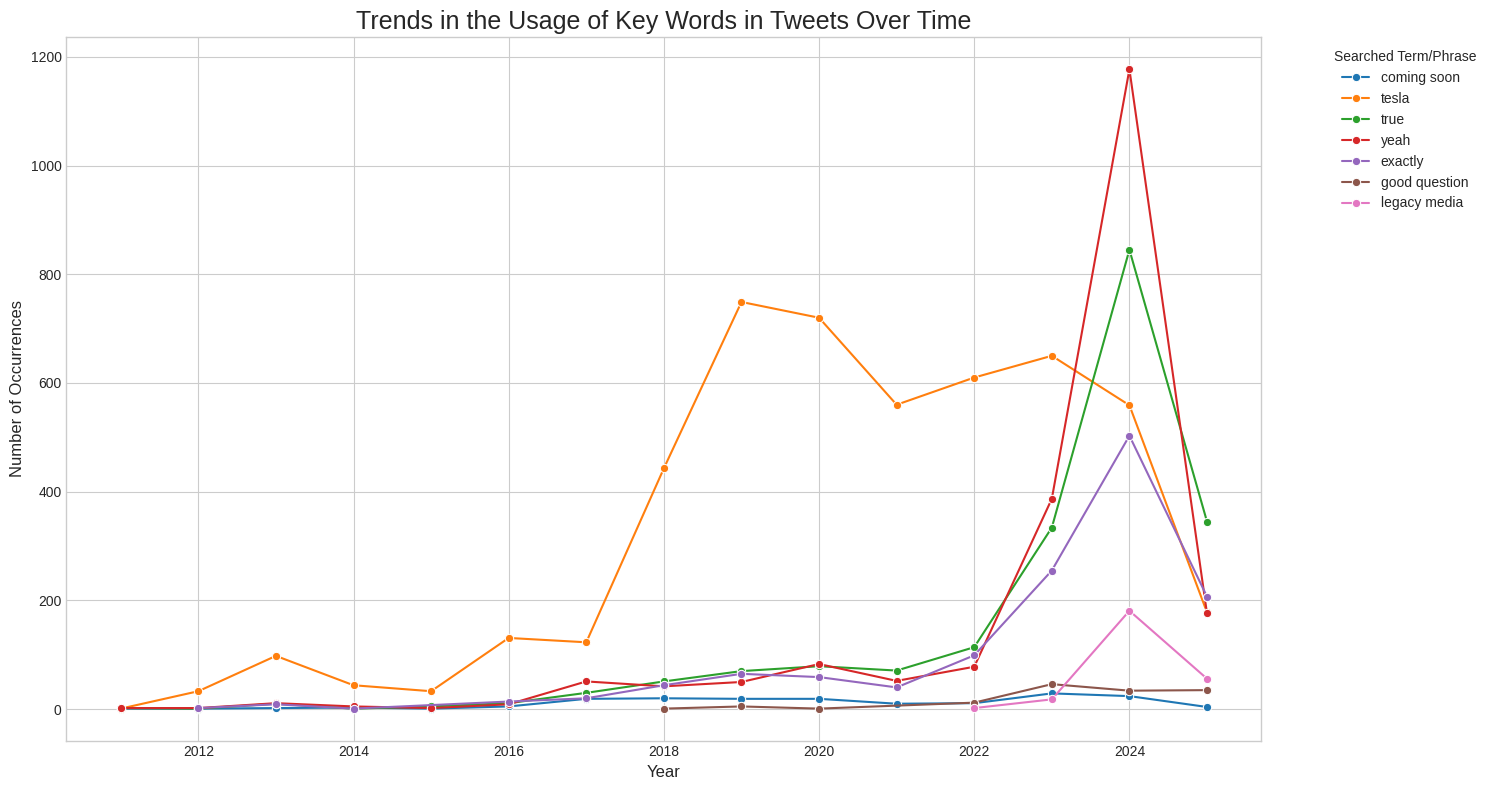

In [3]:
import pandas as pd
import re
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

print("Mounting Google Drive...")
drive.mount('/content/drive', force_remount=True)
print("Google Drive mounted successfully.")

raw_file_path = '/content/drive/MyDrive/all_musk_posts.csv'
date_column_name = 'createdAt'
text_column_name = 'fullText'

data_save_path = '/content/drive/MyDrive/musk_word_frequency_by_year.csv'
chart_save_path = '/content/drive/MyDrive/tweet_trends_chart.png'

try:
    print(f"\nAttempting to load file: {raw_file_path}")
    df = pd.read_csv(raw_file_path, parse_dates=[date_column_name], low_memory=False)
    print("Raw CSV file loaded successfully.")

    target_terms = [
        'yeah', 'tesla', 'true', 'legacy media', 'coming soon',
        'good question', 'exactly'
    ]

    analysis_data = []
    print("Starting tweet analysis...")
    for index, row in df.iterrows():
        post_date = row[date_column_name]
        post_content = row[text_column_name]
        for term in target_terms:
            if isinstance(post_content, str) and term in post_content.lower():
                analysis_data.append({
                    'Date': post_date,
                    'Tweet_Text': post_content,
                    'Found_Term': term
                })

    if not analysis_data:
        print("\nNone of the target terms were found in the file.")
    else:
        df_analysis = pd.DataFrame(analysis_data)
        df_analysis['Year'] = df_analysis['Date'].dt.year

        counts_by_year_term = df_analysis.groupby(['Year', 'Found_Term']).size().reset_index(name='Count')
        print("Data successfully analyzed and aggregated.")

        counts_by_year_term.to_csv(data_save_path, index=False)
        print(f"\nResults table saved to Google Drive as: {data_save_path}")

        plt.style.use('seaborn-v0_8-whitegrid')
        plt.figure(figsize=(15, 8))
        sns.lineplot(data=counts_by_year_term, x='Year', y='Count', hue='Found_Term', marker='o')
        plt.title("Trends in the Usage of Key Words in Tweets Over Time", fontsize=18)
        plt.xlabel("Year", fontsize=12)
        plt.ylabel("Number of Occurrences", fontsize=12)
        plt.legend(title='Searched Term/Phrase', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()

        plt.savefig(chart_save_path, dpi=150)
        print(f"Chart saved to Google Drive as: {chart_save_path}")

        print("\nAnalysis and save process completed successfully!")
        plt.show()

except FileNotFoundError:
    print(f"\nCRITICAL ERROR: File not found at the specified path: {raw_file_path}")
    print("Please DOUBLE-CHECK that the path in the configuration section is correct.")
except KeyError as e:
    print(f"\nCRITICAL ERROR: A column with the name specified in the configuration was not found: {e}")
    print("Please DOUBLE-CHECK that the column names in the configuration section match the ones in your file.")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")
